In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from pathlib import Path

import matplotlib.pyplot as plt
import motorlab as ml
import numpy as np
import seaborn as sns

In [3]:
os.chdir(Path().resolve().parent)

In [12]:
sessions = ml.config.gbyk_sessions

In [23]:
poses = dict()

for session in sessions:
    POSES_DIR = Path("data/gbyk/") / session / "poses"
    poses_ = ml.data.load_from_memmap(POSES_DIR)
    poses_ = ml.poses.change_representation(poses_, "egocentric", "gbyk")
    poses[session] = poses_

In [24]:
intervals = ml.utils.get_intervals(
    data_dir="data/gbyk",
    sessions=sessions,
    experiment="gbyk",
    # include_sitting=False,
    include_homing=True,
)

In [25]:
poses_stacked = dict()

for session, pose in poses.items():
    tmp = np.concatenate([pose[s:e] for s, e in intervals[session]], axis=0)
    n_frames = len(tmp)
    tmp = (
        tmp.reshape(n_frames, 21, 3)
        .transpose(2, 0, 1)
        .reshape(3 * n_frames, 21)
    )
    poses_stacked[session] = tmp

In [26]:
poses_stacked_bex = np.concatenate(
    [poses for session, poses in poses_stacked.items() if "bex" in session],
    axis=0,
)
correlation_bex = np.corrcoef(poses_stacked_bex, rowvar=False)

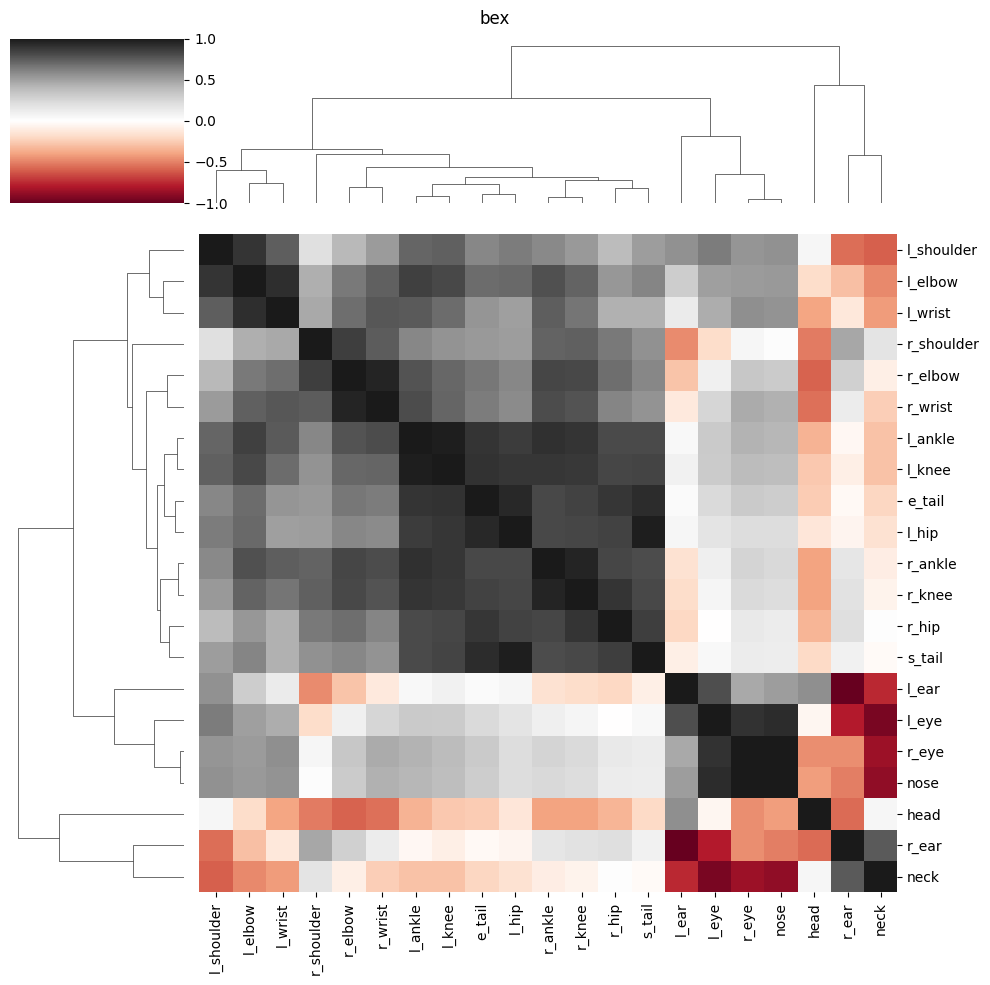

In [27]:
g = sns.clustermap(
    correlation_bex,
    xticklabels=list(ml.poses.keypoints_dict["gbyk"].keys()),
    yticklabels=list(ml.poses.keypoints_dict["gbyk"].keys()),
    cmap="RdGy",  # or any other colormap
    cbar=True,
)
g.fig.suptitle("bex")
plt.tight_layout()
plt.show()

In [28]:
poses_stacked_ken = np.concatenate(
    [poses for session, poses in poses_stacked.items() if "ken" in session],
    axis=0,
)
correlation_ken = np.corrcoef(poses_stacked_ken, rowvar=False)

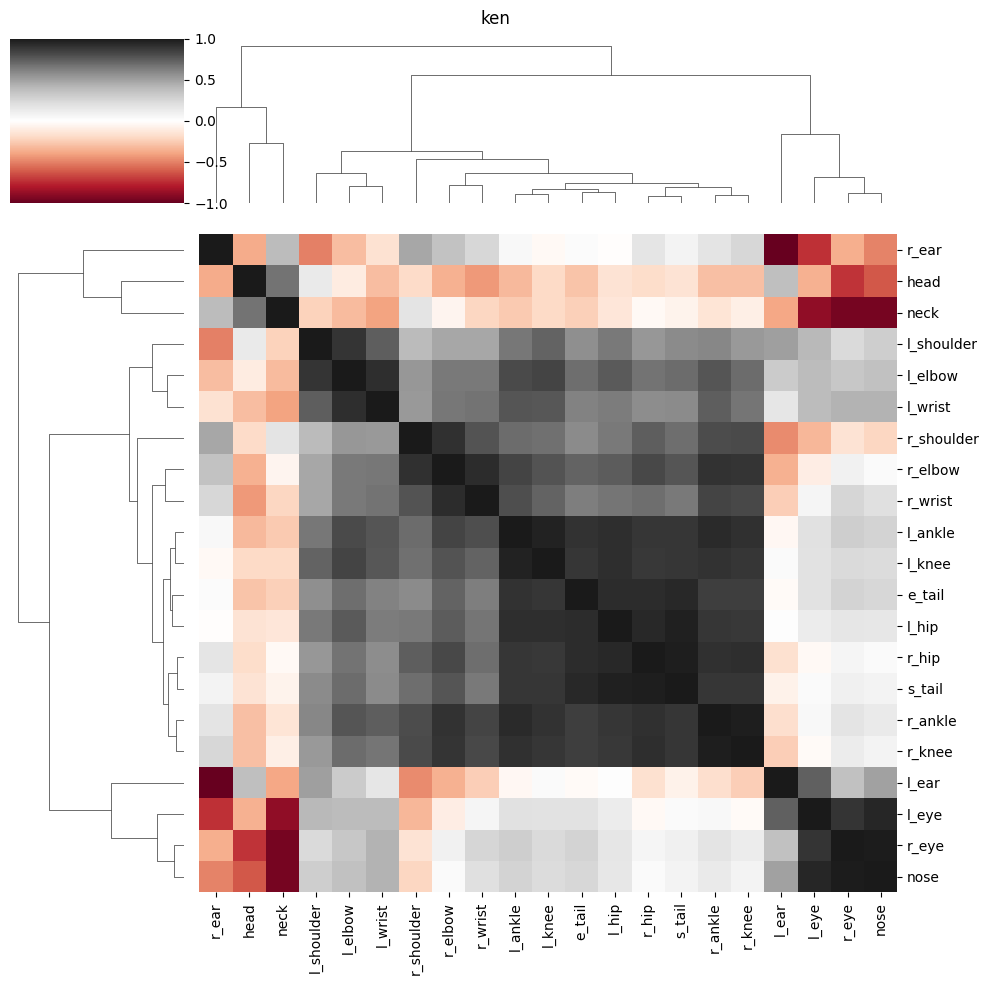

In [29]:
g = sns.clustermap(
    correlation_ken,
    xticklabels=list(ml.poses.keypoints_dict["gbyk"].keys()),
    yticklabels=list(ml.poses.keypoints_dict["gbyk"].keys()),
    cmap="RdGy",  # or any other colormap
    cbar=True,
)
g.fig.suptitle("ken")
plt.tight_layout()
plt.show()